# Purpose
* Combined Case Study 8 & 9's data.
* Compare Linear Regression, Support Vector Machine Regressor, and Random Forest Regressor.
* Create a distribution of goodness-of-fit metrics for each model where the data is randomly sampled for the training set and testing set.
---
### Brandon Johnson

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from mistat import stepwise_regression
import pingouin as pg

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# from explainerdashboard import RegressionExplainer

In [2]:
%load_ext watermark

In [3]:
%watermark -iv

numpy      : 1.24.3
statsmodels: 0.14.0
scipy      : 1.10.1
matplotlib : 3.7.1
pingouin   : 0.5.3
seaborn    : 0.12.2
pandas     : 1.5.3



# Data

In [4]:
df1 = pd.read_csv('Part1_Case Study _8.csv').rename(columns={'Square Feet':'SqFt'})
df1.head()

,Price,Beds,Baths,SqFt
0,330.0,3,2.0,1771
1,400.0,3,2.0,1213
2,416.0,3,2.5,1884
3,420.0,3,2.0,1922
4,496.0,4,2.5,1858


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   45 non-null     float64
 1   Beds    45 non-null     int64  
 2   Baths   45 non-null     float64
 3   SqFt    45 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.5 KB


In [6]:
df2 = pd.read_csv('Part1_Case Study _9.csv').rename(columns={'Years Old':'YrOld'})
df2.head()

,Price,Acres,YrOld,DoM
0,330.0,0.23,4,127
1,400.0,0.17,5,98
2,416.0,0.18,16,105
3,420.0,0.29,80,103
4,496.0,0.52,9,39


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   45 non-null     float64
 1   Acres   45 non-null     float64
 2   YrOld   45 non-null     int64  
 3   DoM     45 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.5 KB


In [8]:
df3 = pd.concat([df1,df2.drop('Price',axis=1)],axis=1,join='inner',)
df3.head()

,Price,Beds,Baths,SqFt,Acres,YrOld,DoM
0,330.0,3,2.0,1771,0.23,4,127
1,400.0,3,2.0,1213,0.17,5,98
2,416.0,3,2.5,1884,0.18,16,105
3,420.0,3,2.0,1922,0.29,80,103
4,496.0,4,2.5,1858,0.52,9,39


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   45 non-null     float64
 1   Beds    45 non-null     int64  
 2   Baths   45 non-null     float64
 3   SqFt    45 non-null     int64  
 4   Acres   45 non-null     float64
 5   YrOld   45 non-null     int64  
 6   DoM     45 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.6 KB


# Linear Regression (All Variables)

In [10]:
X = df3.drop('Price',axis=1).columns
print(X)
y = 'Price'

stepwise_regression(outcome=y, all_vars=X, data=df3)

Index(['Beds', 'Baths', 'SqFt', 'Acres', 'YrOld', 'DoM'], dtype='object')
Step 1 add - (F: 76.52)  Baths
Step 2 add - (F: 4.31)  Acres Baths


({'Acres', 'Baths'},
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a94c645cd0>)

In [11]:
fm1 = 'Price ~ Baths*Acres + SqFt*Acres + YrOld*DoM'
reg1 = smf.ols(formula=fm1,data=df3).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     19.84
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           4.76e-11
Time:                        14:37:54   Log-Likelihood:                -245.30
No. Observations:                  45   AIC:                             508.6
Df Residuals:                      36   BIC:                             524.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     196.2379     46.416      4.228      0.000     102.102     290.374
Baths          93.1781     18.582      5.015      0.000      55.493     130.863
Acres         -29.4038     10.523     -2.794      0.008     -50.746      -8.062
Baths:Acres    -6.8293     10.151     -0.673      0.505     -27.416      13.757
SqFt           -0.0028      0.029     -0.098      0.923      -0.061       0.056
SqFt:Acres      0.0298      0.016      1.817      0.078      -0.003       0.063
YrOld          -1.8918      1.170     -1.618      0.114      -4.264       0.480
DoM            -0.1664      0.224     -0.743      0.462      -0.621       0.288
YrOld:DoM       0.0110      0.010      1.145      0.260      -0.009       0.031
==============================================================================
Omnibus:                        1.629   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.247
Skew:                           0.184   Prob(JB):                        0.536
Kurtosis:                       2.272   Cond. No.                     5.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
def residual_analysis(model,y):
    fig, ax = plt.subplots(1,3,dpi=150,figsize=(14,4))
    ax[0].scatter(model.fittedvalues,model.resid,label='$\hat{y}$',alpha=.75)
    ax[0].scatter(y,model.resid,label='y',alpha=.25)
    ax[0].axhline(0,ls='--',c='k')
    ax[0].set_ylabel('Residuals')
    ax[0].set_xlabel('y or $\hat{y}$')
    ax[0].legend()
    ax[1].hist(model.resid,edgecolor='w')
    pg.qqplot(x=model.resid,dist='norm',confidence=0.95, ax=ax[2])
    ax[0].set_title('Response VS Residuals')
    ax[1].set_title('Residual Histogram')
    ax[2].set_title('Residual QQ')

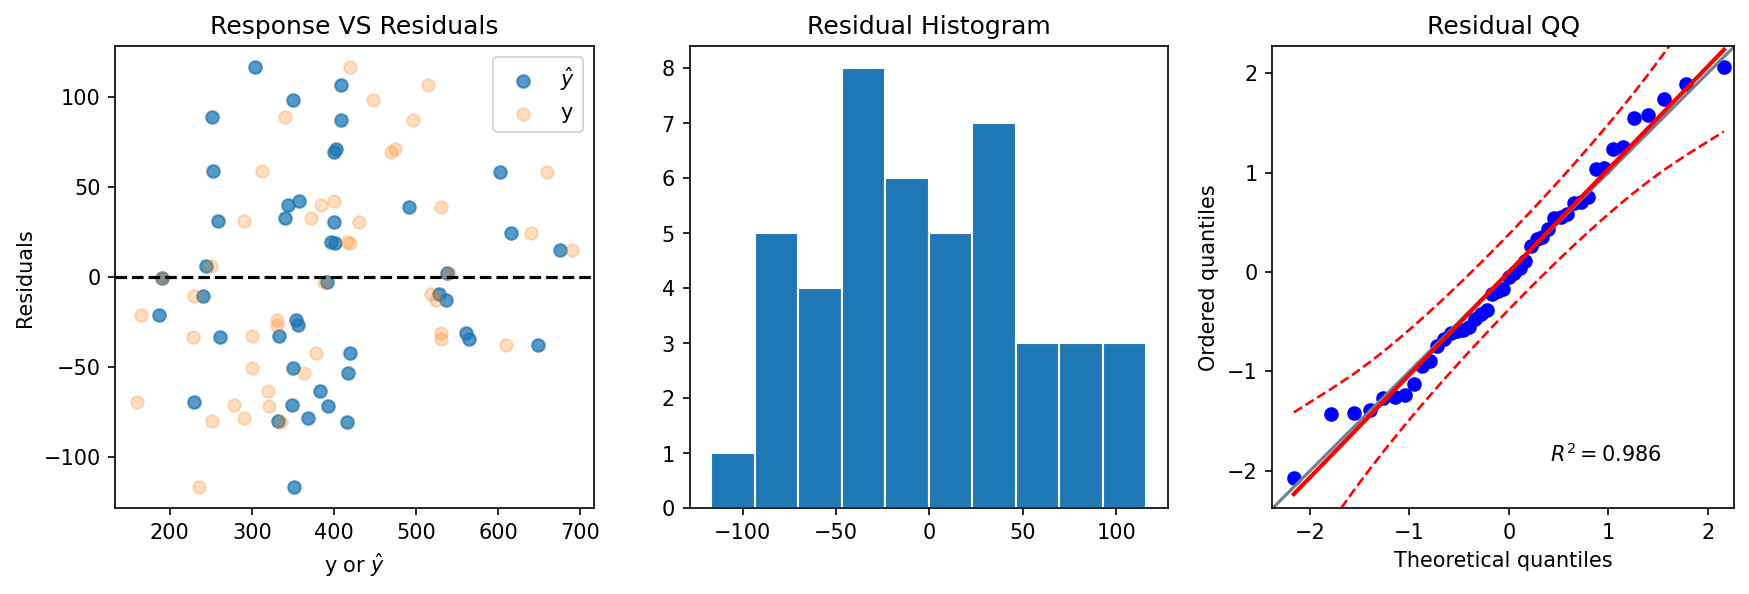

In [13]:
residual_analysis(reg1,y=df3.Price)

In [14]:
results = Stargazer([reg1])
results.show_degrees_of_freedom(False)
results.show_model_numbers(False)
results.custom_columns(['Model 1'],[1])
results

# Model Comparison using Training and Testing Splits

## Data Split

In [15]:
seed = 120

X = df3.drop('Price',axis=1)
y = df3.Price

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=seed,test_size=0.05)

X_train.shape,X_test.shape

((42, 6), (3, 6))

In [16]:
def score(y_true,y_pred):
    r2 = r2_score(y_true=y_true,y_pred=y_pred)
    rmse = mean_squared_error(y_true=y_true,y_pred=y_pred,squared=False)
    print(f'R2: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}')
    return r2,rmse

## SVM Regression

In [17]:
%%time

svr = SVR()

params = dict(
    kernel=['linear', 'poly', 'rbf'],
    C=sp.stats.uniform(.0001,1+.01),
    epsilon=sp.stats.uniform(.01,2+0.01),
)

search = RandomizedSearchCV(estimator=svr,param_distributions=params,n_iter=5000,n_jobs=-1,cv=4,scoring='neg_root_mean_squared_error',random_state=seed)

search.fit(X_train,y_train)

print(f'Neg RMSE: {search.best_score_}')
print(f'Best Params: {search.best_params_}')

Neg RMSE: -100.38267695555459
Best Params: {'C': 0.0016569899138846821, 'epsilon': 1.764087565582041, 'kernel': 'linear'}
CPU times: total: 5.66 s
Wall time: 26.9 s


In [18]:
params = {'C': 0.0016569899138846821, 'epsilon': 1.764087565582041, 'kernel': 'linear'}

svr = SVR(**params)
svr.fit(X_train,y_train)

SVR(C=0.0016569899138846821, epsilon=1.764087565582041, kernel='linear')

In [19]:
y_pred = svr.predict(X_train)
score(y_true=y_train, y_pred=y_pred)

R2: 0.4807
RMSE: 93.6968


(0.4807201060066254, 93.69682244418587)

In [20]:
y_pred = svr.predict(X_test)
score(y_true=y_test, y_pred=y_pred)

R2: 0.8067
RMSE: 42.8313


(0.8066666343421303, 42.83128325467792)

In [21]:
svr.coef_

array([[ 0.02286898,  0.0180922 ,  0.14441182, -0.00292759, -0.21547092,
         0.12613568]])

In [22]:
svr.feature_names_in_

array(['Beds', 'Baths', 'SqFt', 'Acres', 'YrOld', 'DoM'], dtype=object)

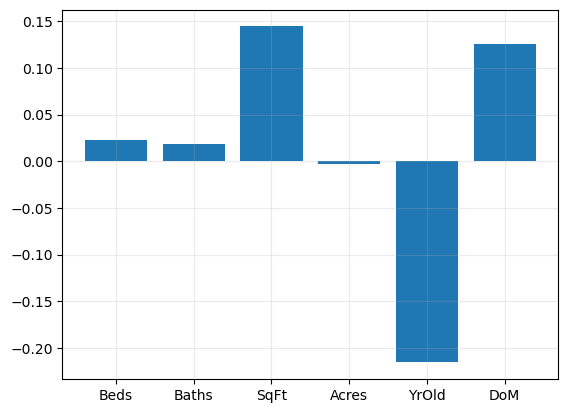

In [23]:
plt.bar(x=svr.feature_names_in_,height=svr.coef_[0])
plt.grid(alpha=.25)

## Random Forest

In [34]:
%%time
rfr = RandomForestRegressor(n_jobs=-1,max_features=.75,random_state=seed,)

params = dict(
    n_estimators=sp.stats.randint(100,500-100), 
    max_features=sp.stats.uniform(.5,1-.5)
)

rand_search = RandomizedSearchCV(estimator=rfr,
                                 param_distributions=params,
                                 n_iter=2000,
                                 n_jobs=-1,
                                 cv=4,
                                 scoring='neg_root_mean_squared_error',
                                 random_state=seed
                                )
rand_search.fit(X_train,y_train)

print(f'Neg RMSE: {rand_search.best_score_}')
print(f'Best Params: {rand_search.best_params_}')

y_pred = rand_search.predict(X_train)
score(y_true=y_train,y_pred=y_pred)

Neg RMSE: -88.78547690578628
Best Params: {'max_features': 0.9087570588771727, 'n_estimators': 134}
R2: 0.9314
RMSE: 34.0586
CPU times: total: 22.7 s
Wall time: 4min 24s


(0.9313870920792517, 34.05861803327472)

In [35]:
y_pred = rand_search.predict(X_test)
score(y_true=y_test,y_pred=y_pred)

R2: 0.9009
RMSE: 30.6574


(0.9009496733101943, 30.657422337302133)

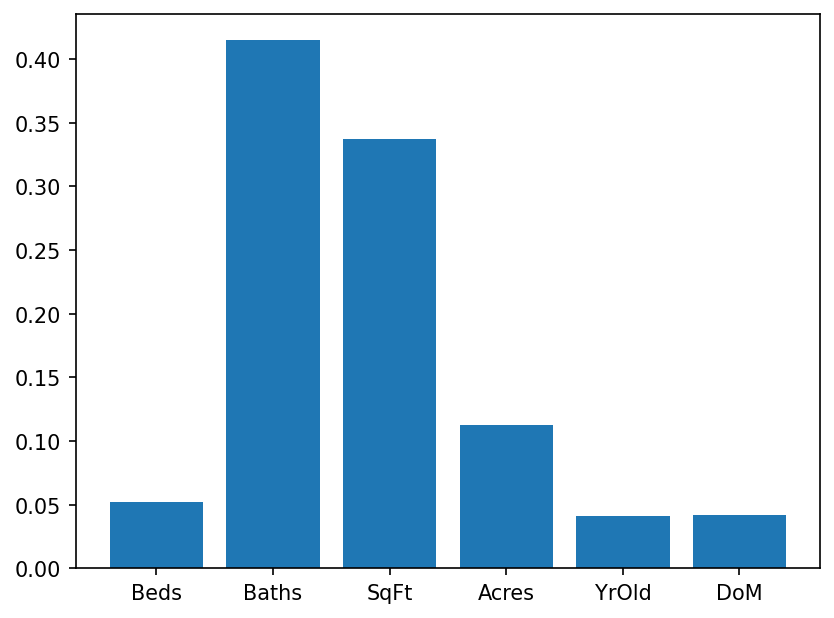

In [39]:
rfr = RandomForestRegressor(**rand_search.best_params_, n_jobs=-1, random_state=seed)
rfr.fit(X_train,y_train)

plt.figure(dpi=150)
plt.bar(x=X_train.columns,height=rfr.feature_importances_)
plt.show()

## Linear Regression

In [29]:
train = pd.concat([X_train,y_train],axis=1)

fm = 'Price ~ Beds + Baths + SqFt + Acres + YrOld + DoM'
lr = smf.ols(formula=fm,data=train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     14.15
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           4.16e-08
Time:                        08:53:18   Log-Likelihood:                -238.19
No. Observations:                  42   AIC:                             490.4
Df Residuals:                      35   BIC:                             502.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.4296     53.297      1.622      0.114     -21.769     194.628
Beds          23.8685     16.814      1.420      0.165     -10.265      58.002
Baths         73.0187     22.189      3.291      0.002      27.972     118.065
SqFt           0.0205      0.030      0.682      0.499      -0.040       0.081
Acres          2.5793      1.899      1.358      0.183      -1.277       6.435
YrOld         -0.8890      0.740     -1.201      0.238      -2.392       0.614
DoM            0.2187      0.145      1.510      0.140      -0.075       0.513
==============================================================================
Omnibus:                        2.207   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                1.422
Skew:                           0.437   Prob(JB):                        0.491
Kurtosis:                       3.220   Cond. No.                     9.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_train)
score(y_true=y_train,y_pred=y_pred)

R2: 0.7080
RMSE: 70.2559


In [31]:
y_pred = lr.predict(X_test)
score(y_true=y_test,y_pred=y_pred)

R2: 0.3691
RMSE: 77.3716


# Score Distributions

In [42]:
def sim_score(y_true,y_pred):
    r2 = r2_score(y_true=y_true,y_pred=y_pred)
    rmse = mean_squared_error(y_true=y_true,y_pred=y_pred,squared=False)
    return r2,rmse

In [43]:
def score_sim(model,X,y,iterations=10):

    train_r2 = []
    train_rmse = []
    test_r2 = []
    test_rmse = []

    for i in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=i,test_size=0.05)

        model.fit(X_train,y_train)
        
        train_pred = model.predict(X_train)
        train_r2_, train_rmse_ = sim_score(y_true=y_train,y_pred=train_pred)
        train_r2.append(train_r2_)
        train_rmse.append(train_rmse_)
        
        test_pred = model.predict(X_test)
        test_r2_, test_rmse_ = sim_score(y_true=y_test,y_pred=test_pred)
        test_r2.append(test_r2_)
        test_rmse.append(test_rmse_)
        
    return train_r2, train_rmse, test_r2, test_rmse


In [44]:
X = df3.drop('Price',axis=1)
y = df3.Price

In [45]:
params = {'C': 0.0016569899138846821, 'epsilon': 1.764087565582041, 'kernel': 'linear'}

svr = SVR(**params)

svr_train_r2, svr_train_rmse, svr_test_r2, svr_test_rmse = score_sim(model=svr,X=X,y=y,iterations=500)

In [59]:
rfr = RandomForestRegressor(n_estimators=500, max_features=0.75,n_jobs=-1, random_state=seed)

rfr_train_r2, rfr_train_rmse, rfr_test_r2, rfr_test_rmse = score_sim(model=rfr,X=X,y=y,iterations=500)

In [47]:
lr = LinearRegression()

lr_train_r2, lr_train_rmse, lr_test_r2, lr_test_rmse = score_sim(model=lr,X=X,y=y,iterations=500)

### RMSE Distributions

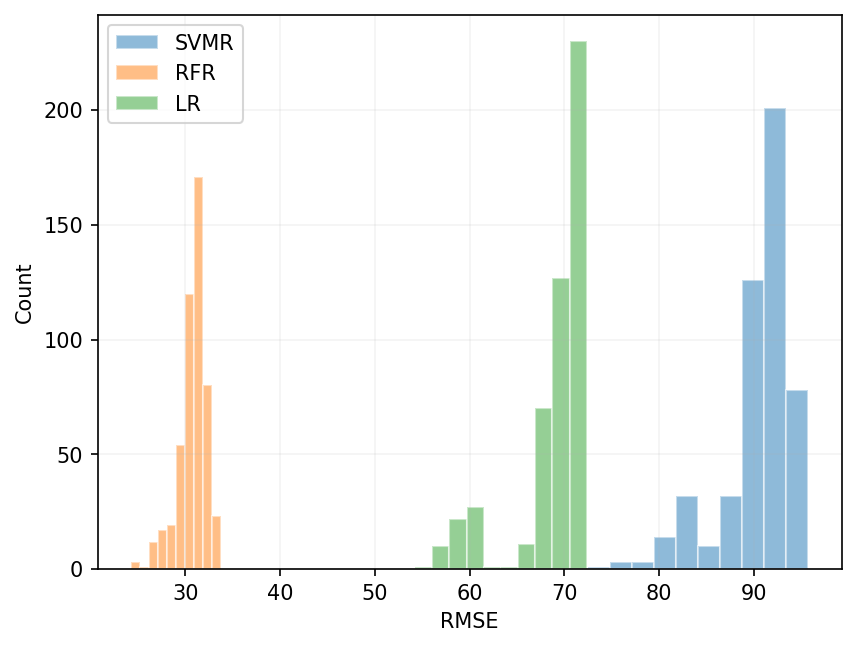

In [60]:
# Training Data

plt.figure(dpi=150)
plt.hist(svr_train_rmse,edgecolor='w',bins=10,label='SVMR',alpha=.5)
plt.hist(rfr_train_rmse,edgecolor='w',bins=10,label='RFR',alpha=.5)
plt.hist(lr_train_rmse,edgecolor='w',bins=10,label='LR',alpha=.5)
plt.grid(alpha=.15)
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.legend()
plt.show()

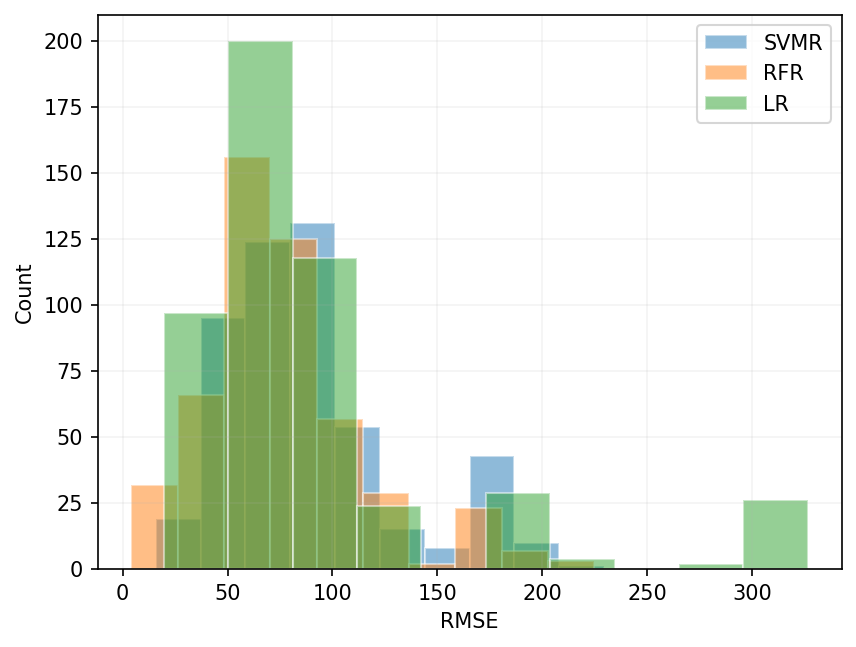

In [61]:
# Testing Data

plt.figure(dpi=150)
plt.hist(svr_test_rmse,edgecolor='w',bins=10,label='SVMR',alpha=.5)
plt.hist(rfr_test_rmse,edgecolor='w',bins=10,label='RFR',alpha=.5)
plt.hist(lr_test_rmse,edgecolor='w',bins=10,label='LR',alpha=.5)
plt.grid(alpha=.15)
plt.legend()
plt.xlabel('RMSE')
plt.ylabel('Count')
plt.show()

### Summary Stats of Score Distributions

In [66]:
def mean_med_sd(x):
    return np.mean(x), np.median(x), np.std(x,ddof=1)

In [67]:
mean_med_sd(svr_test_rmse)

(88.81689890810415, 81.8272302616748, 40.471370718822016)

In [68]:
mean_med_sd(rfr_test_rmse)

(75.97061506407249, 69.50494637275636, 38.24610249553596)

In [69]:
mean_med_sd(lr_test_rmse)

(91.20401825895551, 73.21946377701303, 65.16670374817075)

### ANOVA Test to compare Score Distributions

In [63]:
l = ['svmr']*len(svr_test_rmse)
l.extend(['rfr']*len(rfr_test_rmse))
l.extend(['lr']*len(lr_test_rmse))

data = dict(
    rmse = np.hstack((svr_test_rmse,rfr_test_rmse,lr_test_rmse)),
    model = l
)

sim_df = pd.DataFrame(data)
sim_df

,rmse,model
0,56.404763,svmr
1,48.425828,svmr
2,98.211348,svmr
3,27.032064,svmr
4,88.187680,svmr
...,...,...
1495,60.049997,lr
1496,52.789011,lr
1497,82.033750,lr
1498,78.366418,lr


In [64]:
pg.anova(data=sim_df,dv='rmse',between='model',detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,model,6.713032e+04,2,33565.160025,13.704922,0.000001,0.017981
1,Within,3.666350e+06,1497,2449.131827,NaN,NaN,NaN


In [65]:
pg.pairwise_tukey(data=sim_df,dv='rmse',between='model',)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,lr,rfr,91.204018,75.970615,15.233403,3.12994,4.866995,0.000004,0.284897
1,lr,svmr,91.204018,88.816899,2.387119,3.12994,0.762672,0.725981,0.043975
2,rfr,svmr,75.970615,88.816899,-12.846284,3.12994,-4.104322,0.000126,-0.326014
